       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


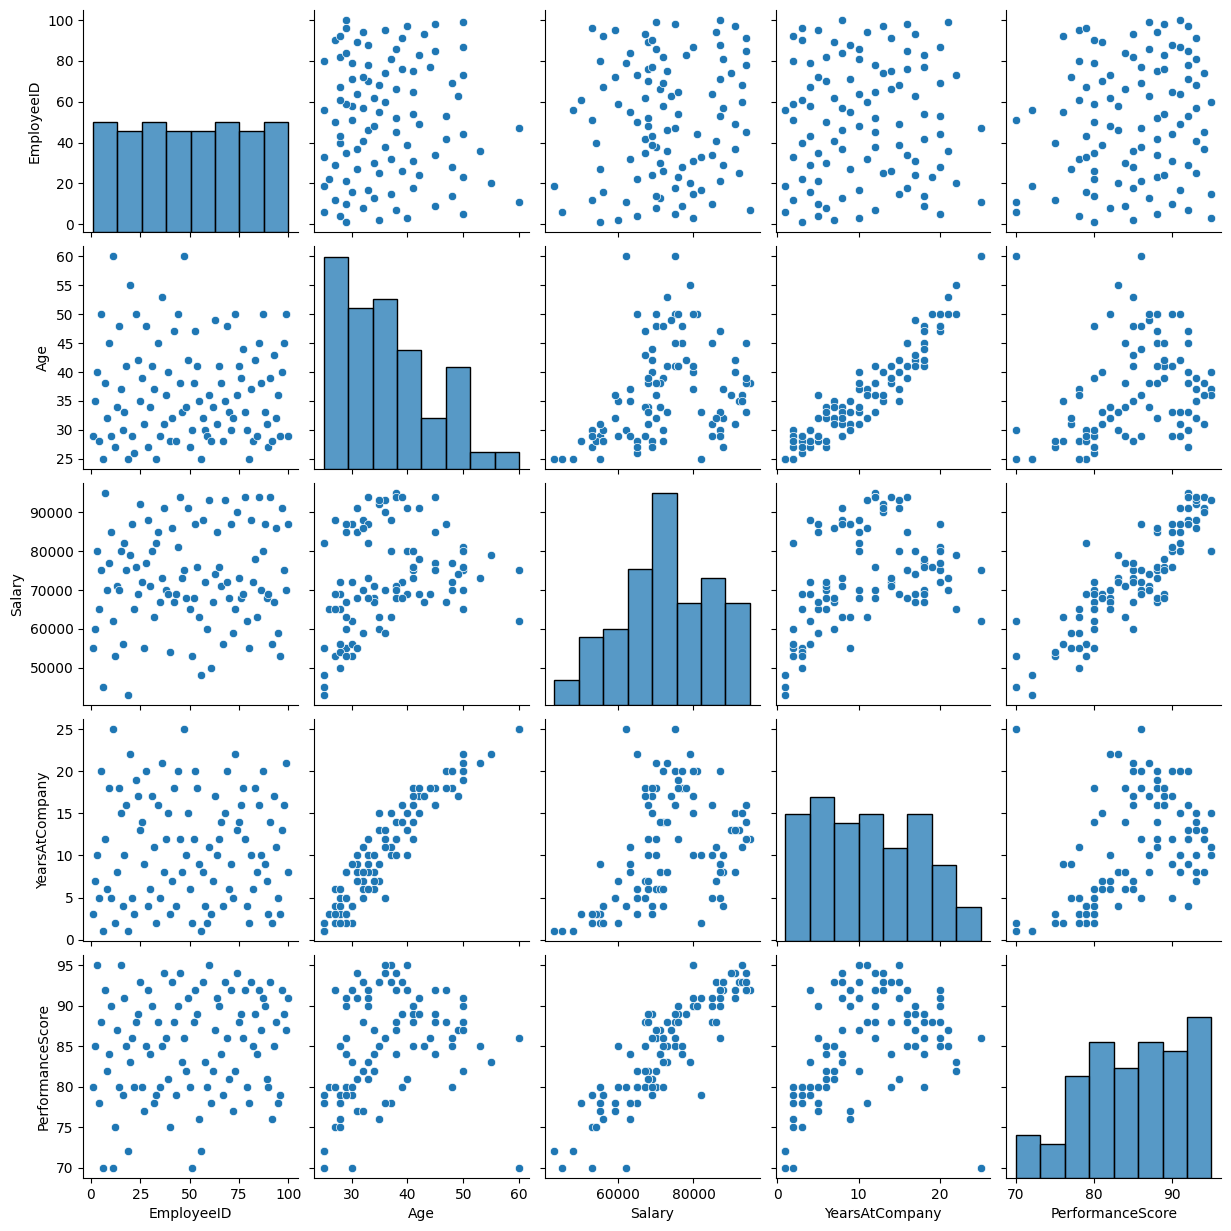

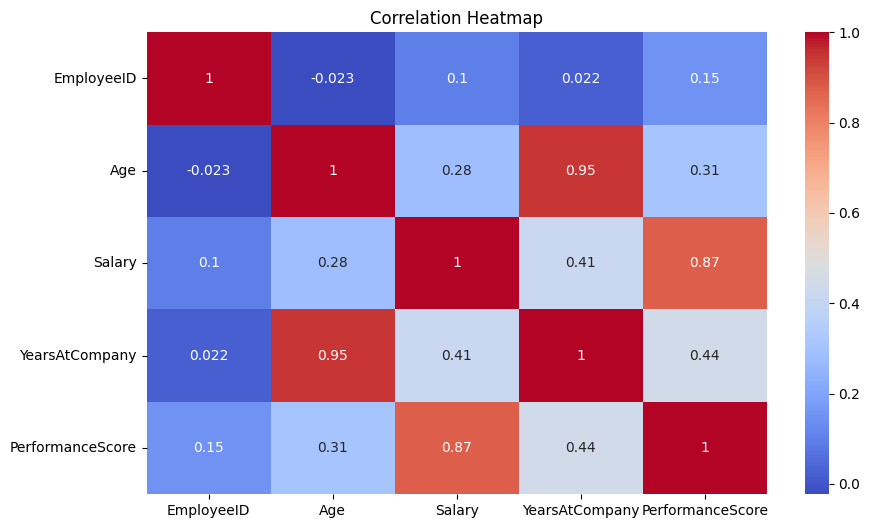

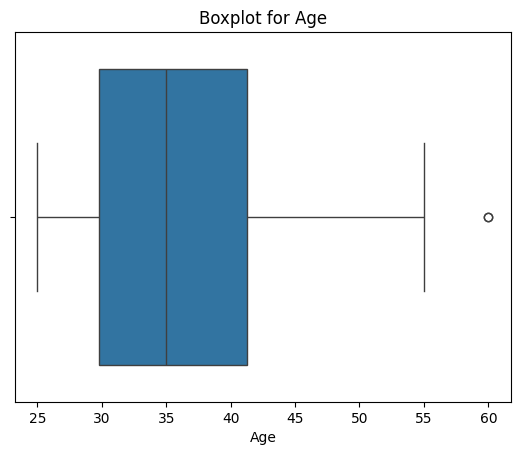

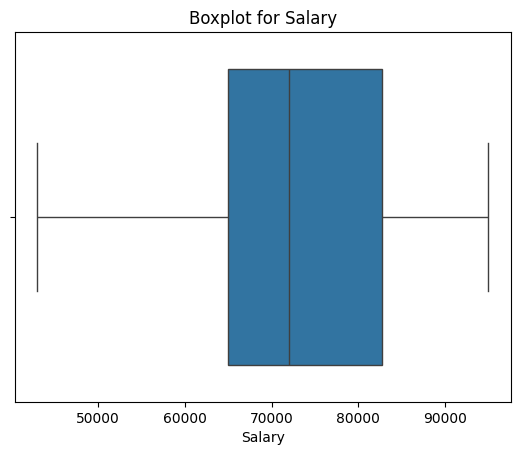

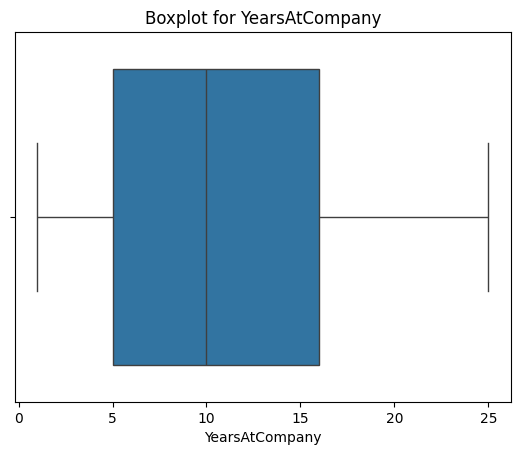

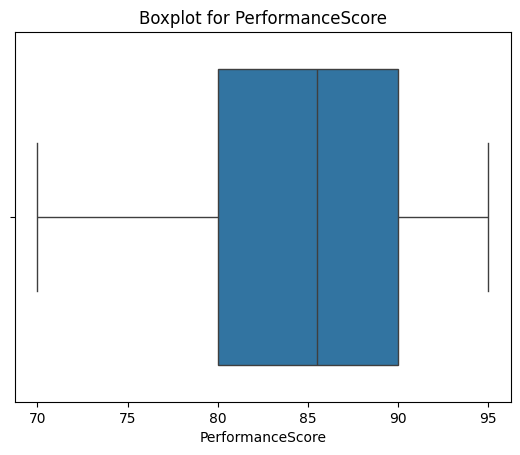

Attrition          No       Yes
Department                     
Engineering  0.571429  0.428571
HR           0.653846  0.346154
Marketing    0.800000  0.200000
Sales        0.461538  0.538462
Attrition                No       Yes
Performance_Level                    
Low                0.625000  0.375000
Medium             0.692308  0.307692
High               0.533333  0.466667
F-statistic: 25.781068086646336 P-value: 2.5591493445552222e-12
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.44      0.57      0.50         7

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



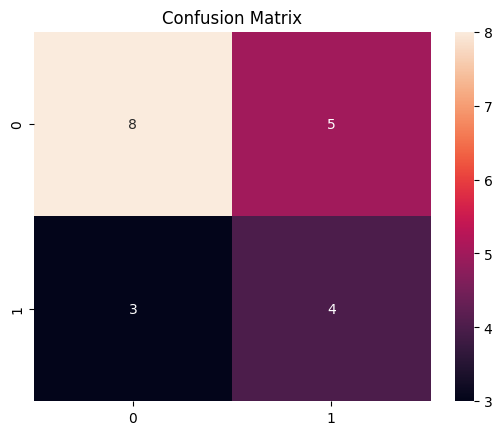

R-squared: 0.7514693739822027
MSE: 12.68997376446873


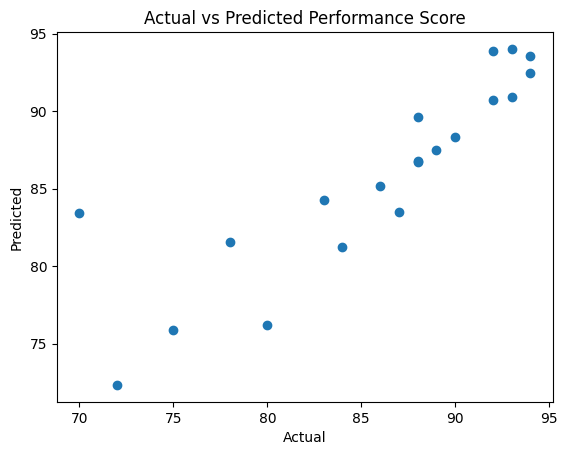

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DL Classification Accuracy: 0.6399999856948853
Key Insights:
- Departments with high attrition:
Department
Sales          14
Engineering    12
HR              9
Marketing       4
Name: count, dtype: int64
- High performance tends to correlate with lower attrition.


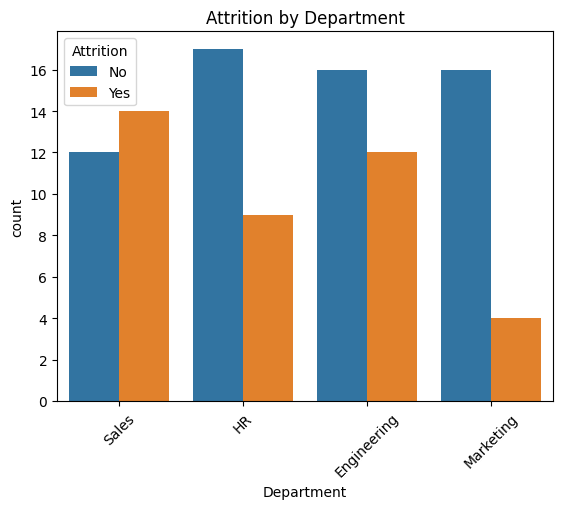

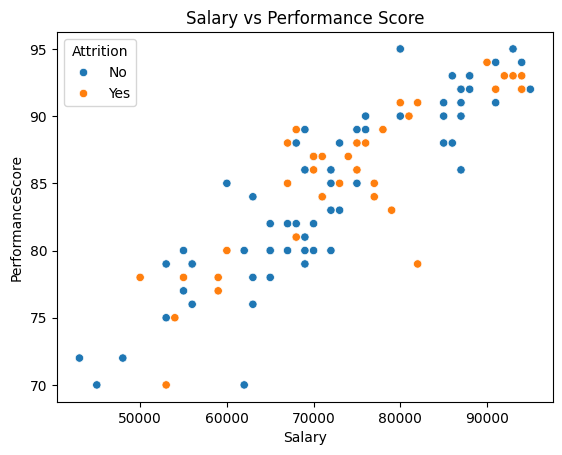

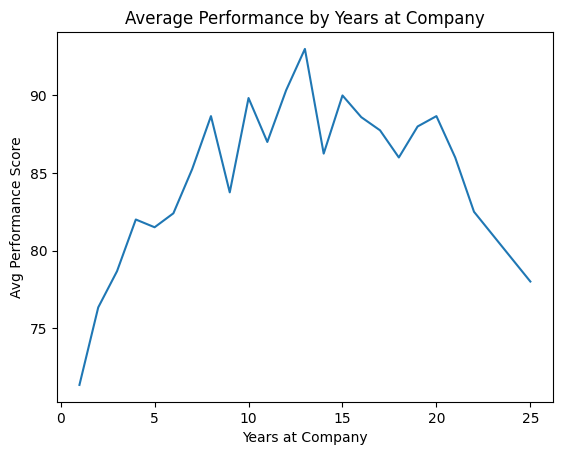

In [8]:
# Employee Performance and Retention Analysis
# Submision Date : 2025-07-30
# submitted by : Kanishk Sorout

# Phase 1 - Data Collection and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1 - Data Collection and Preprocessing
df = pd.read_csv(r"/employee_data.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Step 2 - EDA
print(df.describe())

# Pairplot
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()

# Heatmap (Fixed: Only numeric columns)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for outlier detection
num_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Step 3 - Probability and Statistical Analysis
# P(Attrition | Department)
attrition_prob = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
print(attrition_prob)

# Bayes' Theorem: P(Attrition|Performance)
df['Performance_Level'] = pd.cut(df['PerformanceScore'], bins=3, labels=['Low', 'Medium', 'High'])
bayes_table = pd.crosstab(df['Performance_Level'], df['Attrition'], normalize='index')
print(bayes_table)

# Hypothesis Test: Is mean performance score same across departments?
departments = df['Department'].unique()
performance_by_dept = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]
f_stat, p_value = stats.f_oneway(*performance_by_dept)
print("F-statistic:", f_stat, "P-value:", p_value)

# Phase 2 - Predictive Modeling
# Step 4 - Feature Engineering
scaler = StandardScaler()
df['Salary_scaled'] = scaler.fit_transform(df[['Salary']])
df['PerformanceScore_scaled'] = scaler.fit_transform(df[['PerformanceScore']])

le = LabelEncoder()
df['Attrition_label'] = le.fit_transform(df['Attrition'])
df['Department_label'] = le.fit_transform(df['Department'])

# Step 5 - Classification Model
features_cls = ['Age', 'Salary_scaled', 'YearsAtCompany', 'PerformanceScore_scaled', 'Department_label']
target_cls = 'Attrition_label'

X_cls = df[features_cls]
y_cls = df[target_cls]
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Step 6 - Regression Model
features_reg = ['Age', 'Salary_scaled', 'YearsAtCompany', 'Department_label']
target_reg = 'PerformanceScore'

X_reg = df[features_reg]
y_reg = df[target_reg]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

print("R-squared:", r2_score(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Performance Score")
plt.show()

# Phase 3 - Deep Learning
# Step 7 - Neural Network for Performance Prediction
X_dl_reg = df[features_reg].values
y_dl_reg = df['PerformanceScore'].values

model_reg = Sequential([
    Dense(16, activation='relu', input_shape=(X_dl_reg.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')
model_reg.fit(X_dl_reg, y_dl_reg, epochs=100, batch_size=16, verbose=0)

# Step 8 - Neural Network for Attrition Classification
X_dl_cls = df[features_cls].values
y_dl_cls = df['Attrition_label'].values

model_cls = Sequential([
    Dense(16, activation='relu', input_shape=(X_dl_cls.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cls.fit(X_dl_cls, y_dl_cls, epochs=100, batch_size=16, verbose=0)

# Evaluate deep learning classification model
loss, accuracy = model_cls.evaluate(X_dl_cls, y_dl_cls, verbose=0)
print("DL Classification Accuracy:", accuracy)

# Phase 4 - Reporting and Insights
# Step 9 - Summary
print("Key Insights:")
print("- Departments with high attrition:")
print(df[df['Attrition'] == 'Yes']['Department'].value_counts())
print("- High performance tends to correlate with lower attrition.")

# Step 10 - Visualizations
# Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

# Salary vs Performance
sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=df)
plt.title("Salary vs Performance Score")
plt.show()

# Line plot: Average performance by years
avg_perf = df.groupby('YearsAtCompany')['PerformanceScore'].mean()
plt.plot(avg_perf)
plt.title("Average Performance by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Avg Performance Score")
plt.show()
